In [ ]:
#Importamos la libreias que se van a utilizar
import numpy as np
import pandas as pd
import re
import seaborn as sns
import sweetviz as sv
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
#Creamos el data set, a partir del CSV
df = pd.read_csv('movies_final.csv',sep =',', encoding = 'utf-8')

In [ ]:
df.head(2)

,collection_movie,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,vote_average,vote_count,ROI,actors,director,release_year,release_month,release_day,return,earns
0,['toy story collection'],30000000.0,"['animation', 'comedy', 'family']",862,en,"led by woody, andy's toys live happily in his ...",21.946943,['pixar animation studios'],['united states of america'],1995-10-30,...,77.0,54150.0,1245.0,"['tom hanks', 'tim allen', 'don rickles', 'jim...",john lasseter,1995.0,10.0,30.0,124.518011,3.705540e+09
1,['n/a'],65000000.0,"['adventure', 'fantasy', 'family']",8844,en,when siblings judy and peter discover an encha...,17.015539,"['tristar pictures', 'teitler film', 'intersco...",['united states of america'],1995-12-15,...,69.0,24130.0,404.0,"['robin williams', 'jonathan hyde', 'kirsten d...",joe johnston,1995.0,12.0,15.0,40.430346,2.562972e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45572 entries, 0 to 45571
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   collection_movie      45572 non-null  object 
 1   budget                45480 non-null  float64
 2   genres                45549 non-null  object 
 3   id                    45541 non-null  object 
 4   original_language     45572 non-null  object 
 5   overview              45572 non-null  object 
 6   popularity            45467 non-null  object 
 7   production_companies  45466 non-null  object 
 8   production_countries  45454 non-null  object 
 9   release_date          45393 non-null  object 
 10  revenue               45415 non-null  float64
 11  runtime               45572 non-null  float64
 12  spoken_languages      45572 non-null  object 
 13  status                45572 non-null  object 
 14  title                 45447 non-null  object 
 15  vote_average       

In [ ]:
#Cantidad de filas y columnas
df.shape

(45572, 25)

In [ ]:
#Cambiamos el tipo de dato de las columnas a str
df['release_year'] = df['release_year'].astype(str)
df['release_month'] = df['release_month'].astype(str)
df['release_day'] = df['release_day'].astype(str)

# **Resumen Estadístico**

In [ ]:
#Analisis estadístico las variables númericas
analisis = df.describe(include=[np.number])

In [ ]:
round(analisis,0)

,budget,revenue,runtime,vote_average,vote_count,ROI,return,earns
count,45480.0,4.541500e+04,45572.0,45423.0,45412.0,45411.0,45572.0,4.539200e+04
mean,4223000.0,1.121780e+08,992.0,57.0,1100.0,17083.0,6572.0,1.080054e+08
std,17421067.0,6.436223e+08,10523.0,45.0,4916.0,2150531.0,745325.0,6.304744e+08
min,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-1.500000e+08
25%,0.0,0.000000e+00,850.0,50.0,30.0,0.0,0.0,0.000000e+00
50%,0.0,0.000000e+00,950.0,60.0,100.0,0.0,0.0,0.000000e+00
75%,0.0,0.000000e+00,1060.0,68.0,340.0,0.0,0.0,0.000000e+00
max,380000000.0,2.787965e+10,2244142.0,2017.0,140750.0,419747662.0,123963830.0,2.764265e+10


> De acuerdo con el análisis anterior la mayoría de los datos numéricos que se encuentran en la base de datos están bastante dispersos de acuerdo con la medida de la desviación estándar.

In [ ]:
#Analisis estadístico de las variables categoricas
df.describe(include=object)

,collection_movie,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,spoken_languages,status,title,actors,director,release_year,release_month,release_day
count,45572,45549,45541,45572,45572,45467,45466,45454,45393,45572,45572,45447,45411,45572,45572,45572,45572
unique,1794,4133,45502,138,44356,43733,22417,2171,17319,1877,53,42203,42622,17562,140,13,32
top,['n/a'],['drama'],['n/a'],en,sin descripcion,0.0,['n/a'],['united states of america'],2008-01-01,['english'],released,0.0,['n/a'],['n/a'],2014.0,1.0,1.0
freq,40975,5000,7,32311,985,82,6272,15627,136,22481,44941,12,2411,887,1971,5990,5922


 > De acuerdo con el resumen estadístico anterior para las variables cualitativas el género más común es drama, el lenguaje original es inglés, el país que más produce películas es EE. UU. e igualmente el lenguaje hablado es inglés.

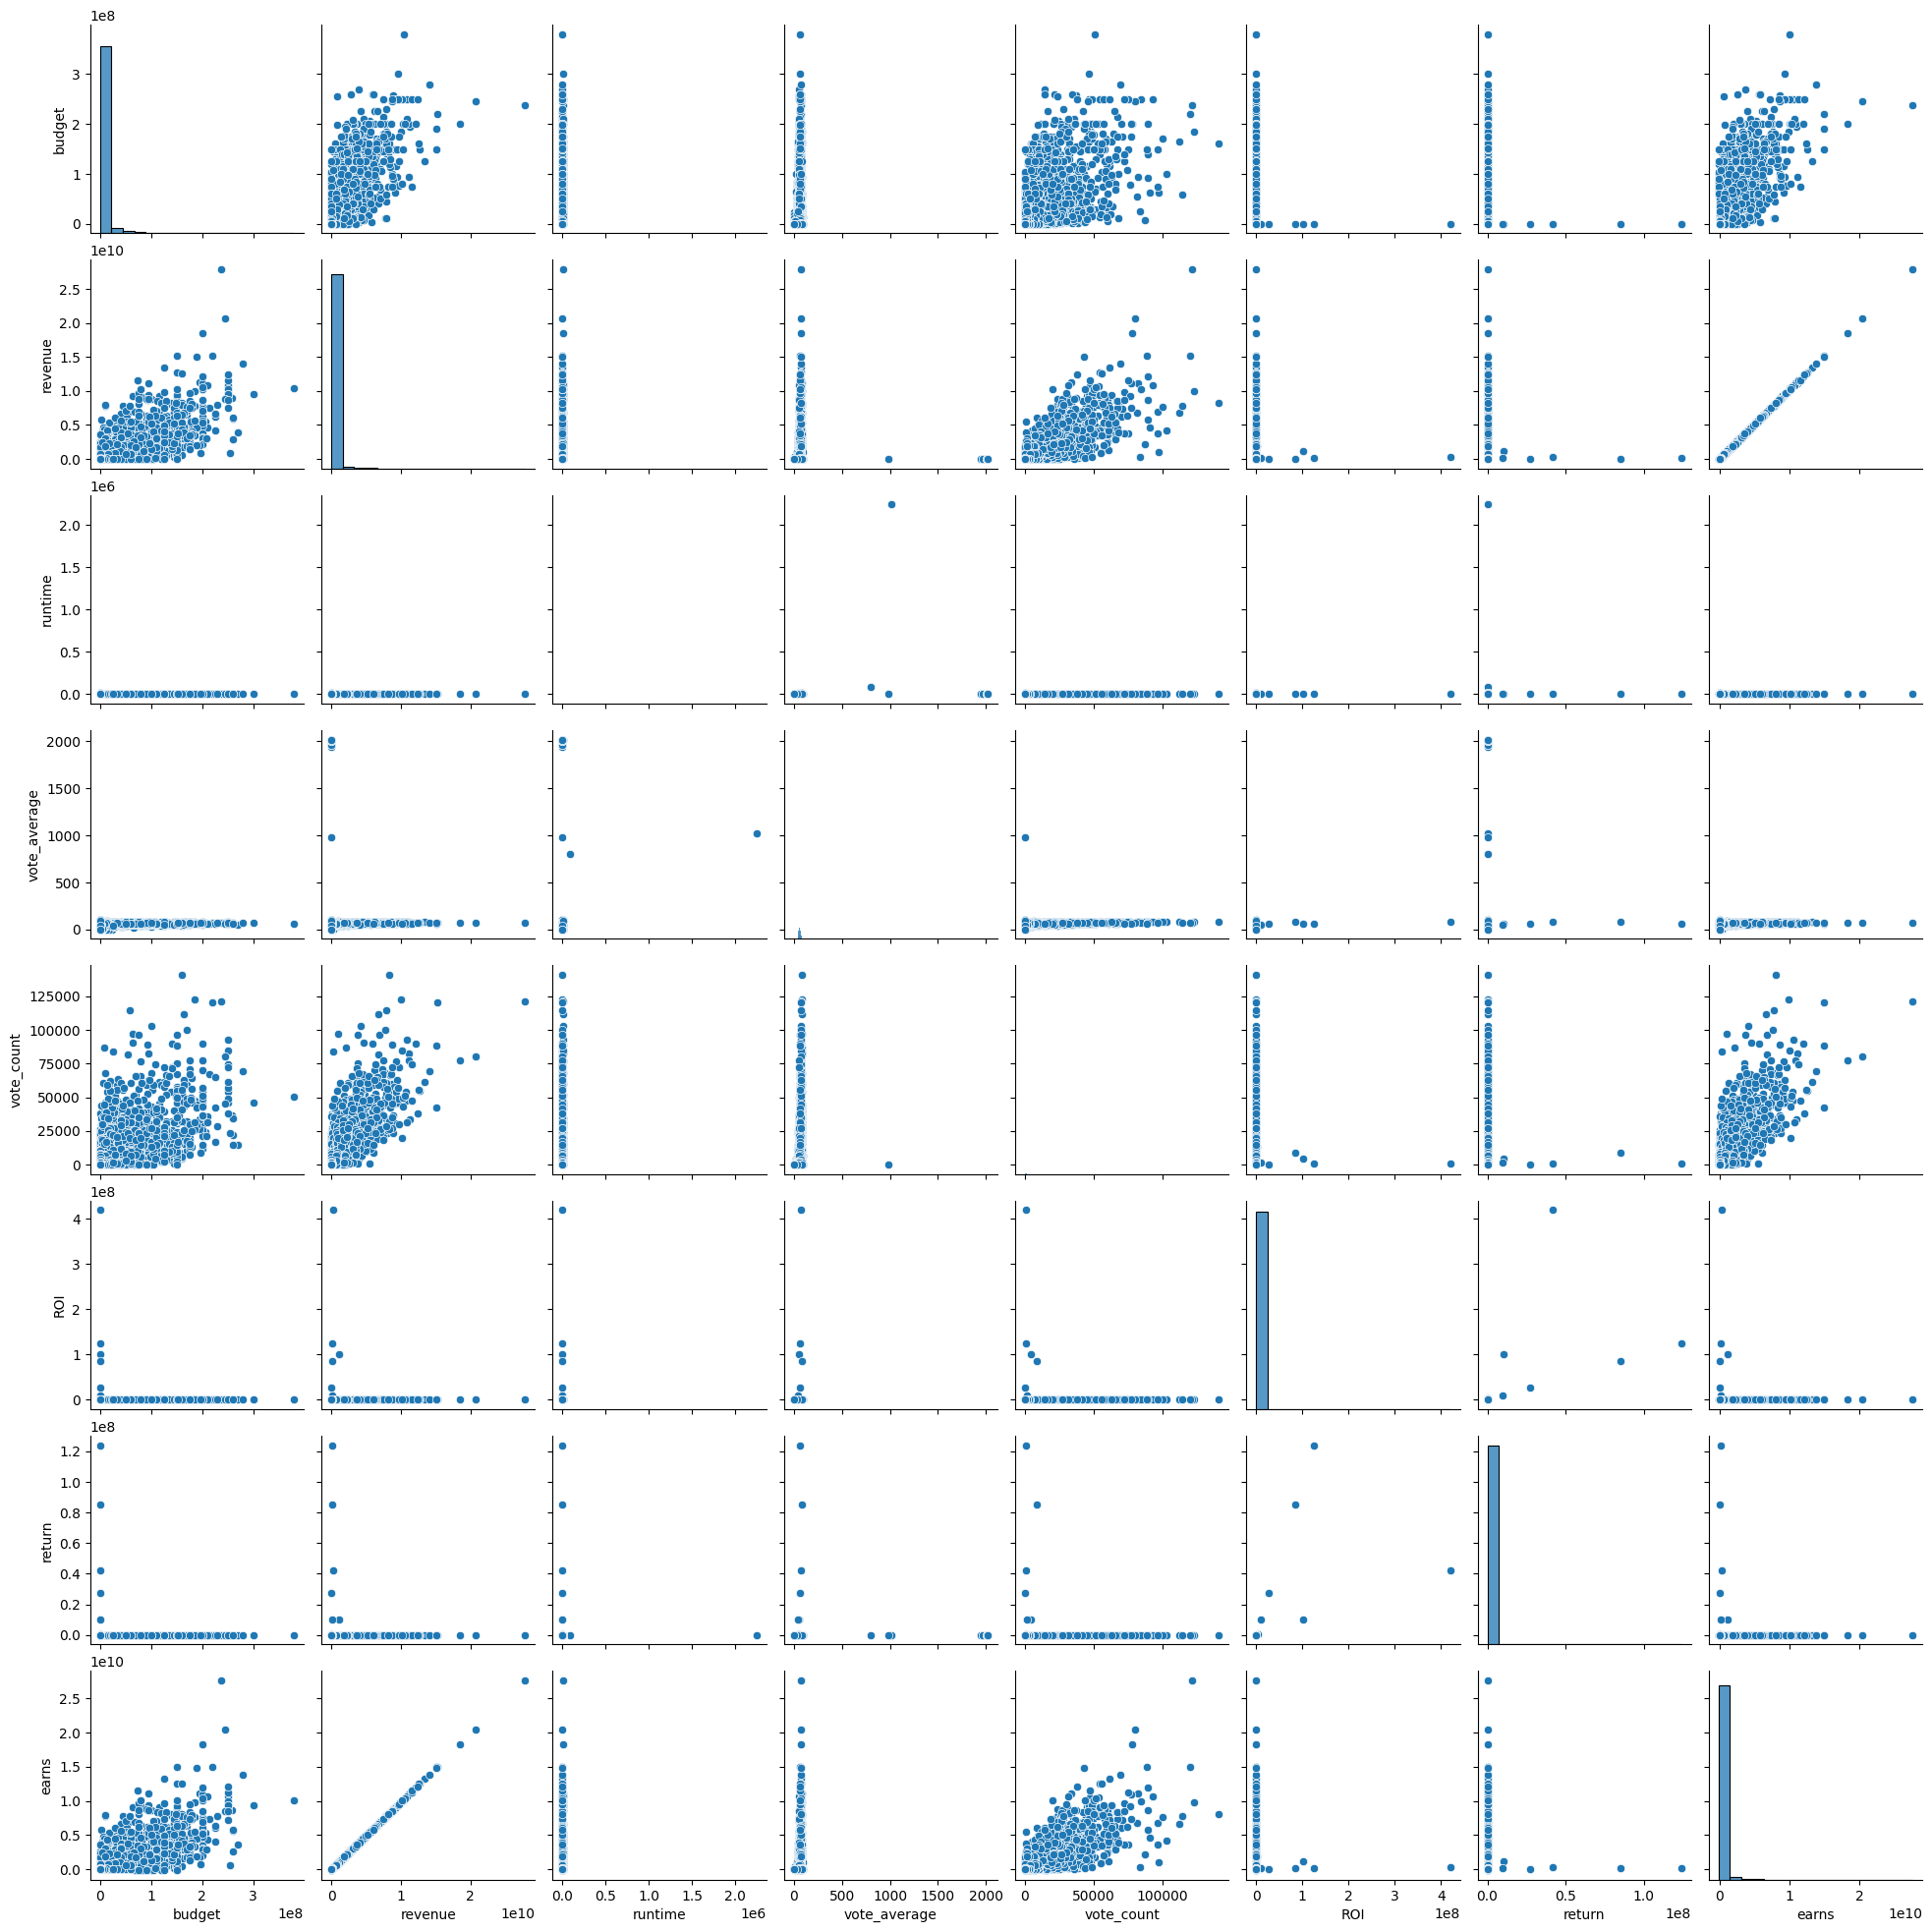

In [ ]:
#Hacemos un grafico donde tengamos los histogramas y graficos de dispersión de las variables anteriores
sns.pairplot(data=df)

> En general se observa que los datos no pertenecen a una distribución normal, por otra parte la mayor parte de los datos se encuentran muy dispersos y los únicas variables que describen una relación lineal son _earns_ y _revenue_.

In [ ]:
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''
    if isinstance(texto, float):  # Verificar si el valor es de tipo float
        return []  # Devolver una lista vacía en caso de que sea float

    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]

    return(nuevo_texto)

In [ ]:
# Se aplica la función de limpieza y tokenización a cada pelicula
# ==============================================================================
df['title_tokenizado'] = df['title'].apply(lambda x: limpiar_tokenizar(x))
df[['title', 'title_tokenizado']].head()

,title,title_tokenizado
0,toy story,"[toy, story]"
1,jumanji,[jumanji]
2,grumpier old men,"[grumpier, old, men]"
3,waiting to exhale,"[waiting, to, exhale]"
4,father of the bride part ii,"[father, of, the, bride, part, ii]"


# **Análisis Exploratorio de los Titulos de las películas**

In [ ]:
# Unnest de la columna title_tokenizado
# ==============================================================================
title_tidy = df.explode(column='title_tokenizado')
title_tidy = title_tidy.drop(columns='title')
title_tidy = title_tidy.rename(columns={'title_tokenizado':'token'})
title_tidy.head(3)


,collection_movie,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,vote_count,ROI,actors,director,release_year,release_month,release_day,return,earns,token
0,['toy story collection'],30000000.0,"['animation', 'comedy', 'family']",862,en,"led by woody, andy's toys live happily in his ...",21.946943,['pixar animation studios'],['united states of america'],1995-10-30,...,54150.0,1245.0,"['tom hanks', 'tim allen', 'don rickles', 'jim...",john lasseter,1995.0,10.0,30.0,124.518011,3.705540e+09,toy
0,['toy story collection'],30000000.0,"['animation', 'comedy', 'family']",862,en,"led by woody, andy's toys live happily in his ...",21.946943,['pixar animation studios'],['united states of america'],1995-10-30,...,54150.0,1245.0,"['tom hanks', 'tim allen', 'don rickles', 'jim...",john lasseter,1995.0,10.0,30.0,124.518011,3.705540e+09,story
1,['n/a'],65000000.0,"['adventure', 'fantasy', 'family']",8844,en,when siblings judy and peter discover an encha...,17.015539,"['tristar pictures', 'teitler film', 'intersco...",['united states of america'],1995-12-15,...,24130.0,404.0,"['robin williams', 'jonathan hyde', 'kirsten d...",joe johnston,1995.0,12.0,15.0,40.430346,2.562972e+09,jumanji


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
# Obtención de listado de stopwords del inglés
# ==============================================================================
stop_words = list(stopwords.words('english'))
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("amp", "xa", "xe"))
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
# Filtrado para excluir stopwords
# ==============================================================================
title_tidy = title_tidy[~(title_tidy["token"].isin(stop_words))]

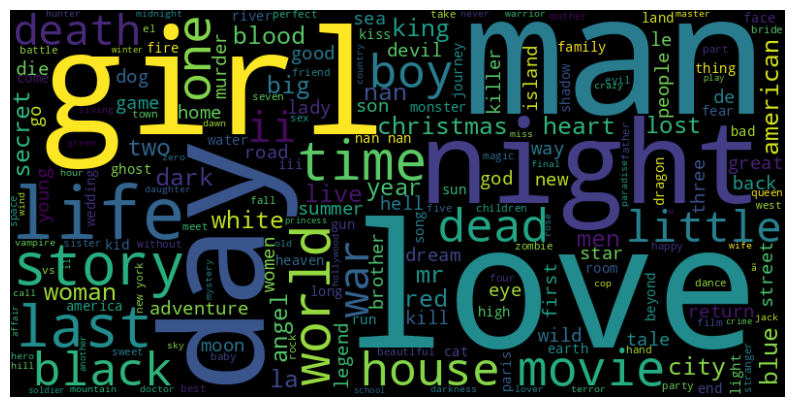

In [ ]:


# Unir todos los tokens en un solo texto
all_tokens = ' '.join(title_tidy['token'].astype(str))

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_tokens)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


> Analizando la nuebe de palabras anterior las palabras más comunes en los titulos de las peliculas son:
* Love
* Man
* Girl
* Day
* Night
* Life


/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["


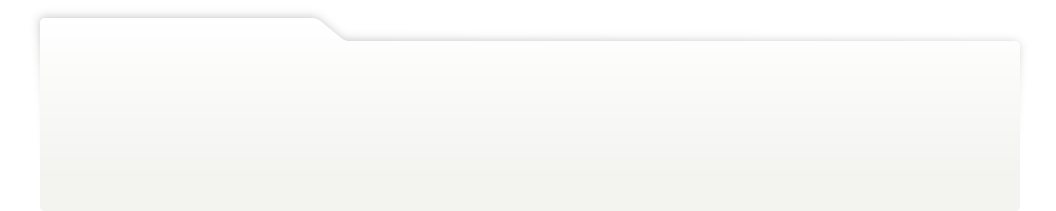
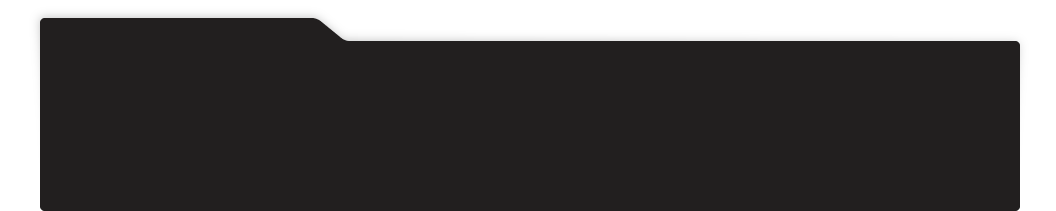
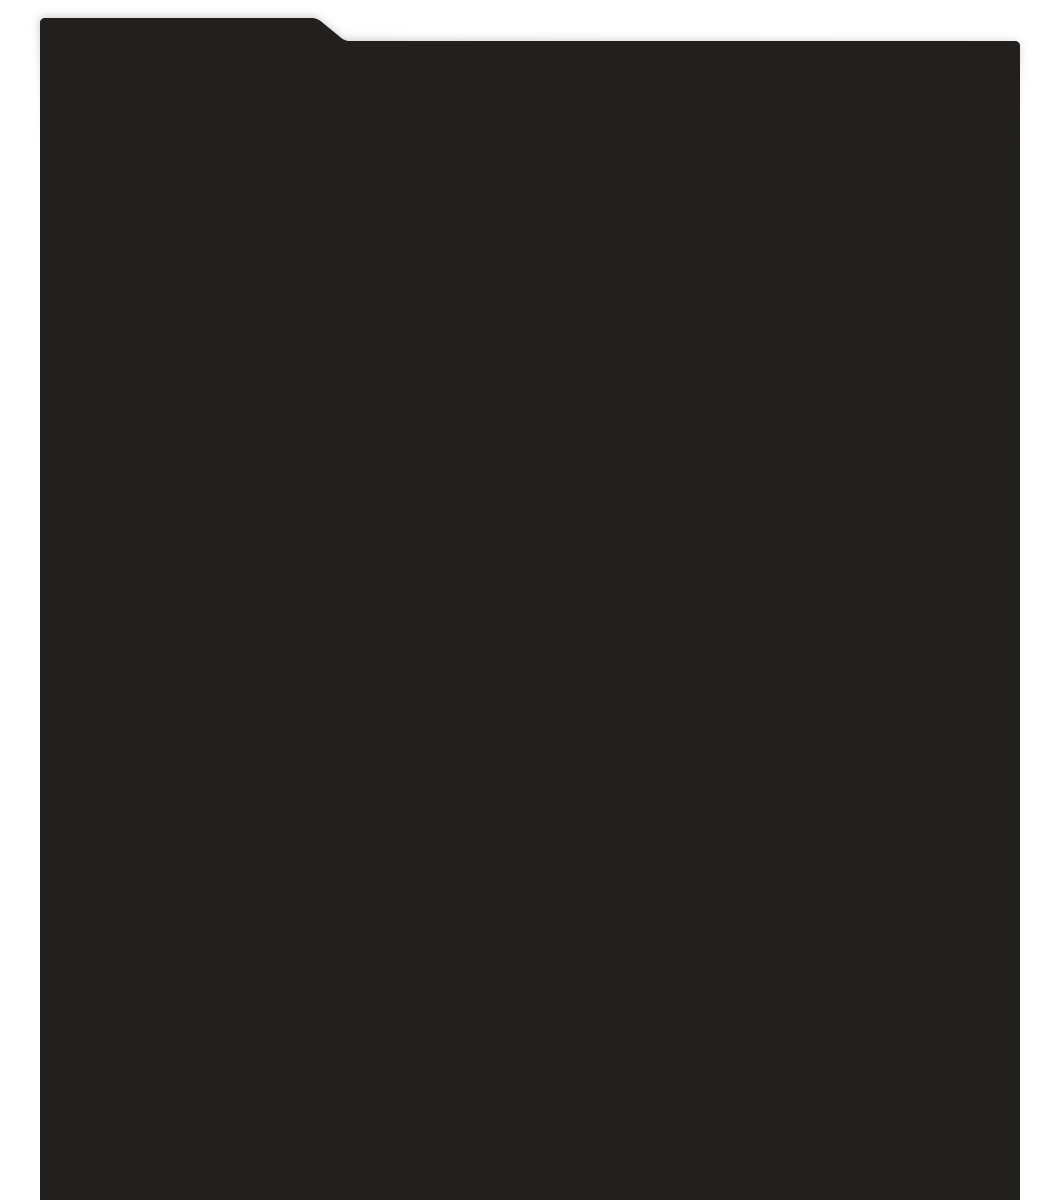
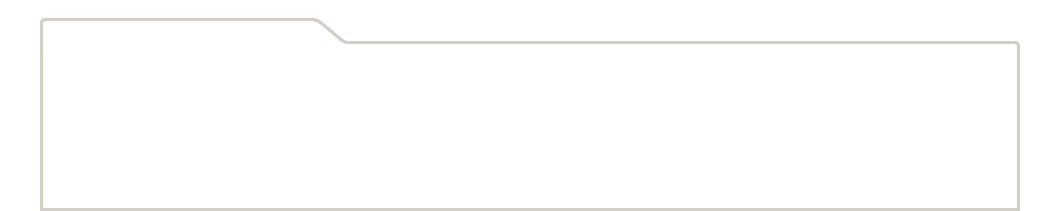
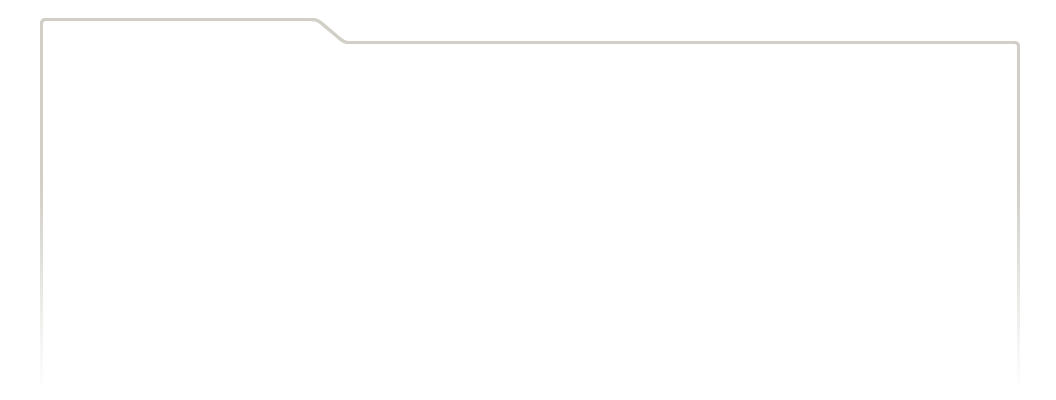
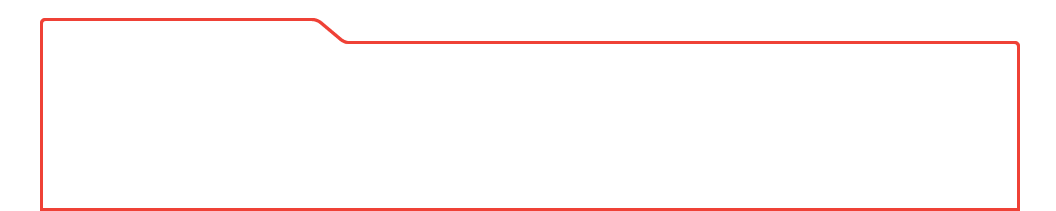
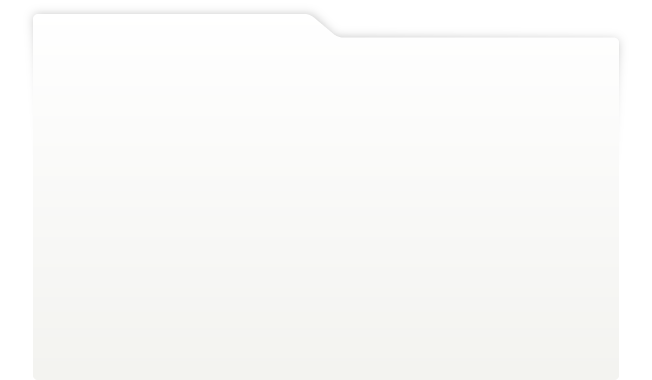
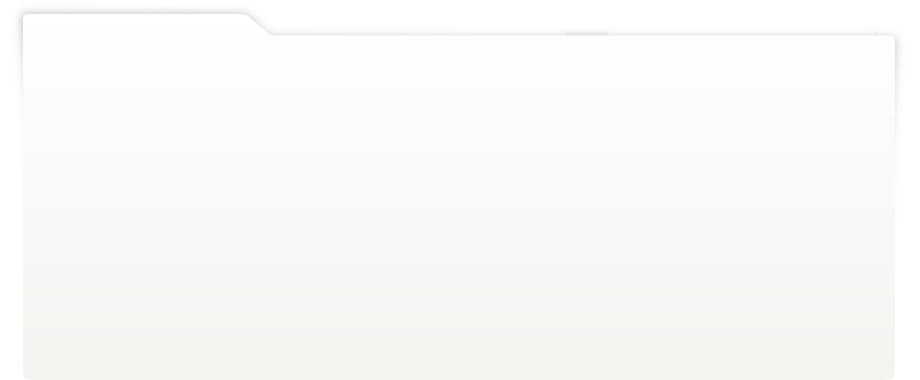
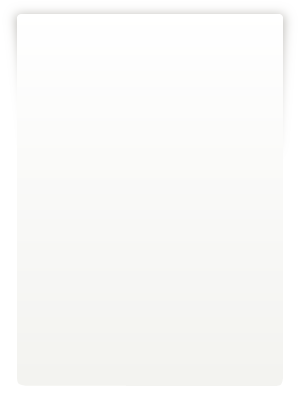
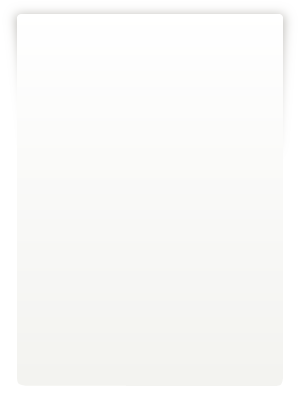
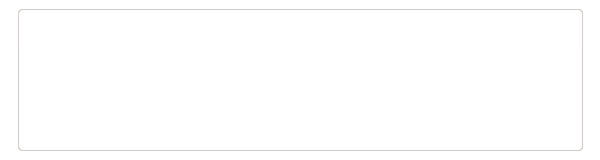
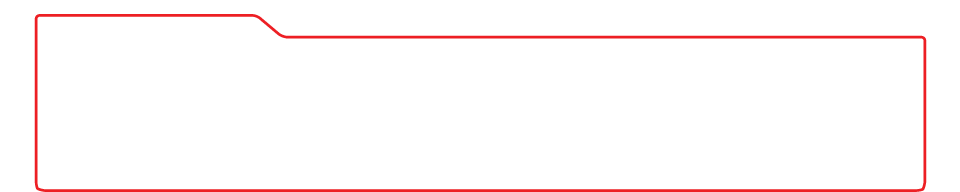
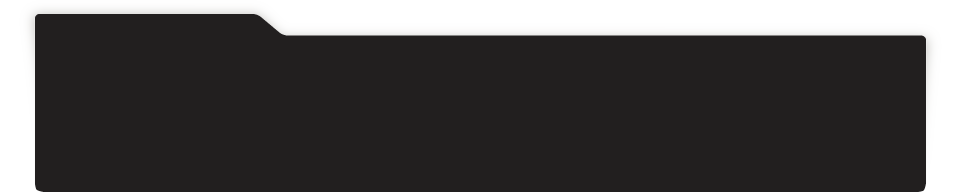
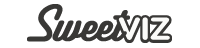
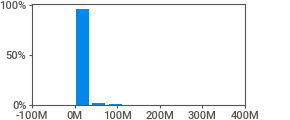
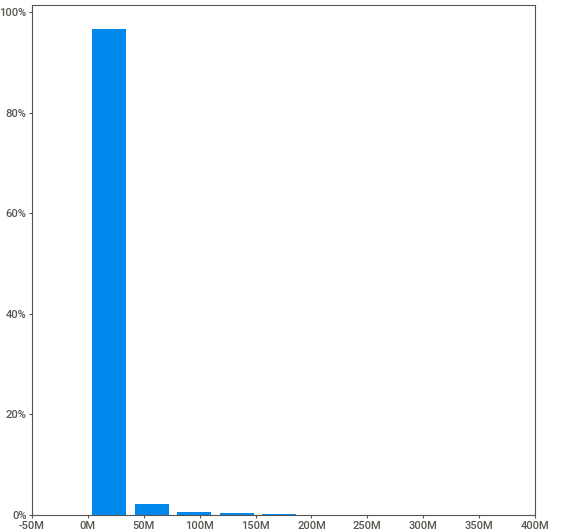
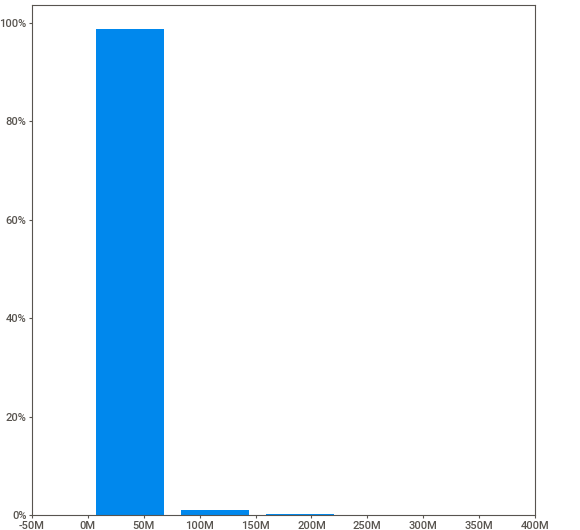
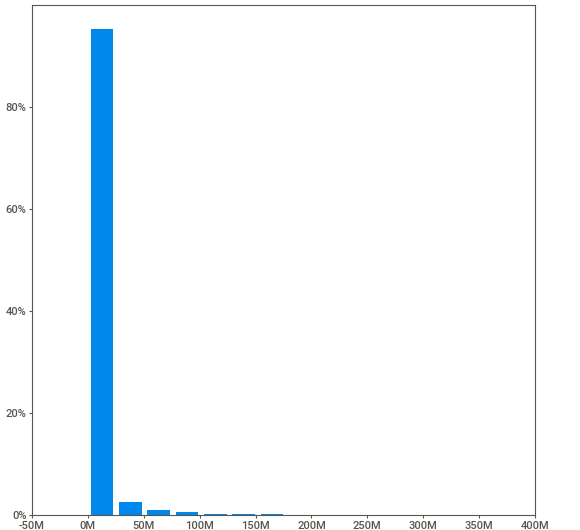
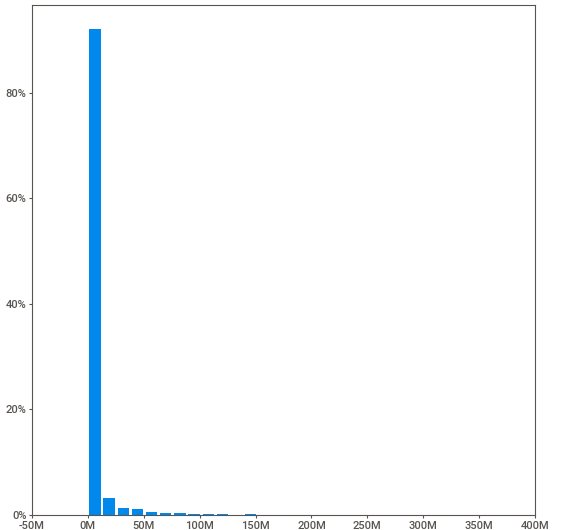
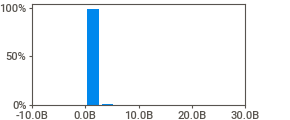
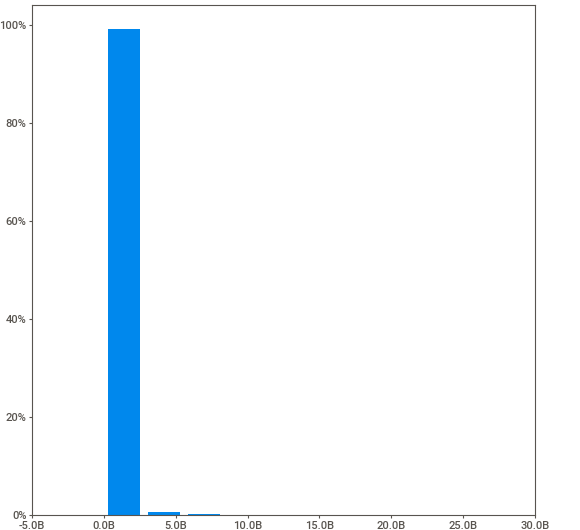
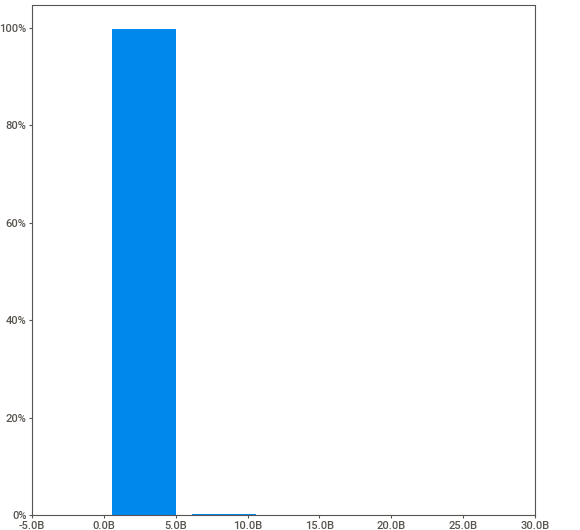
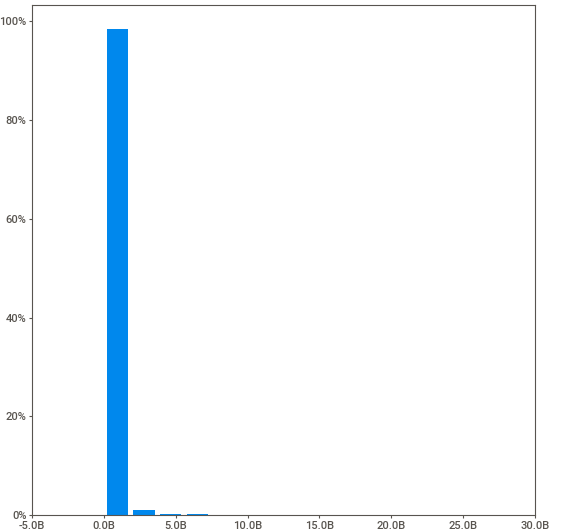
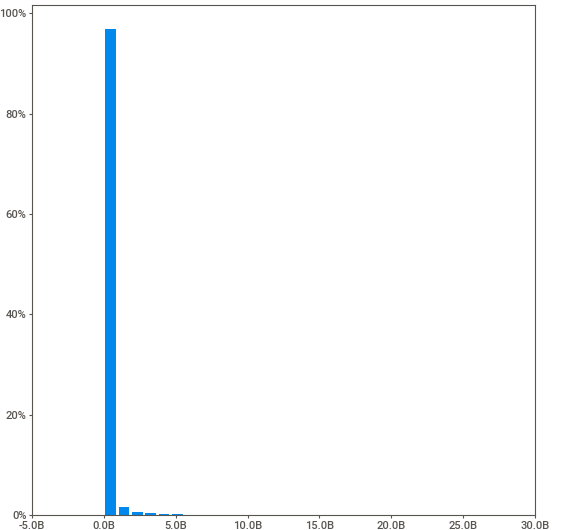
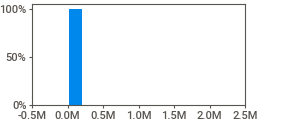
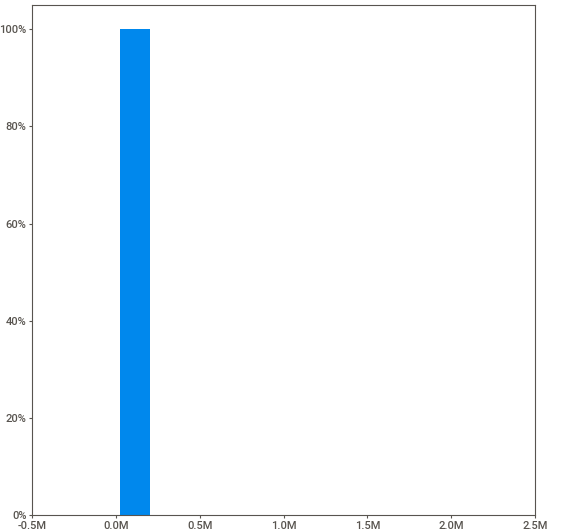
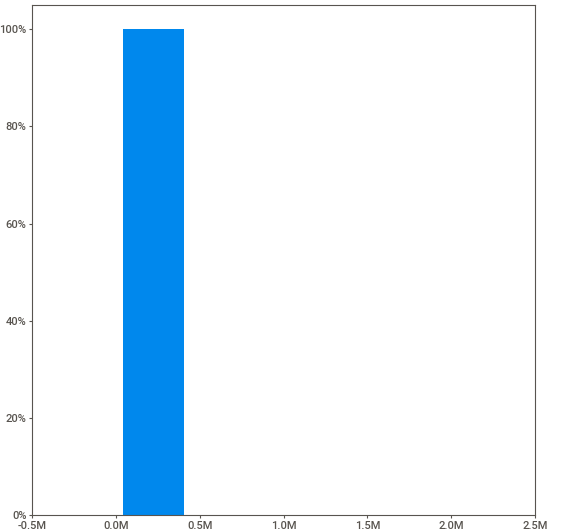
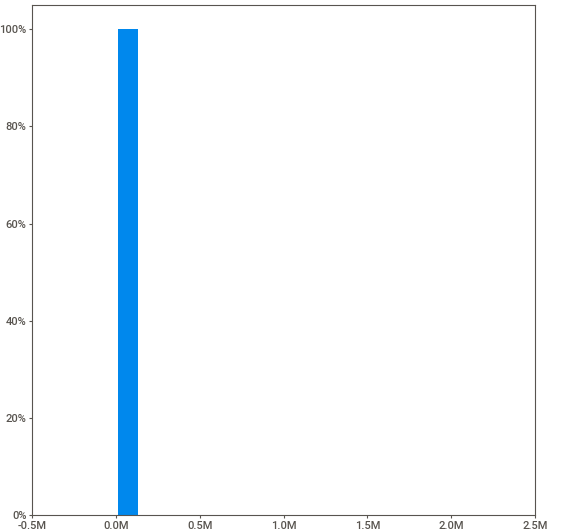
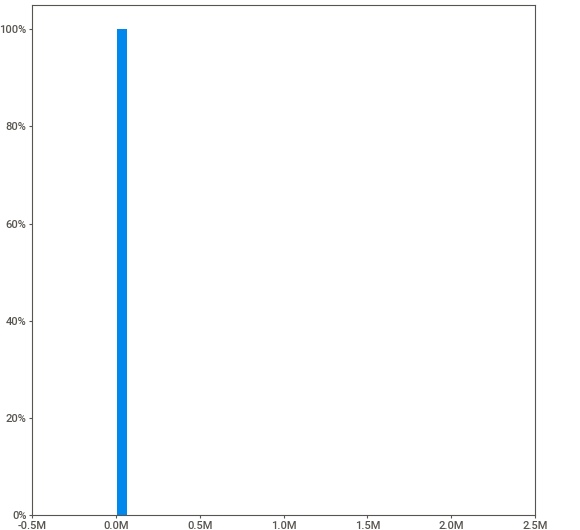
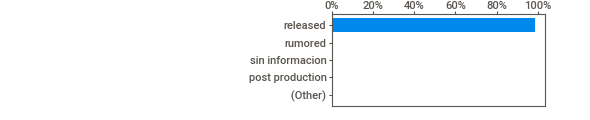
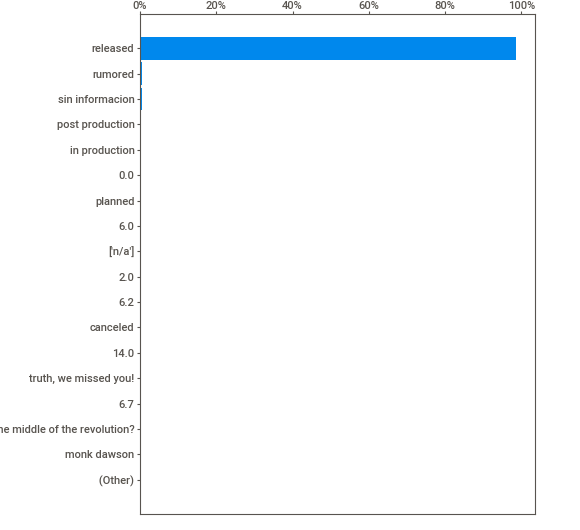
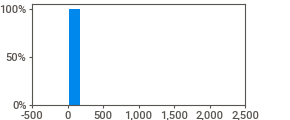
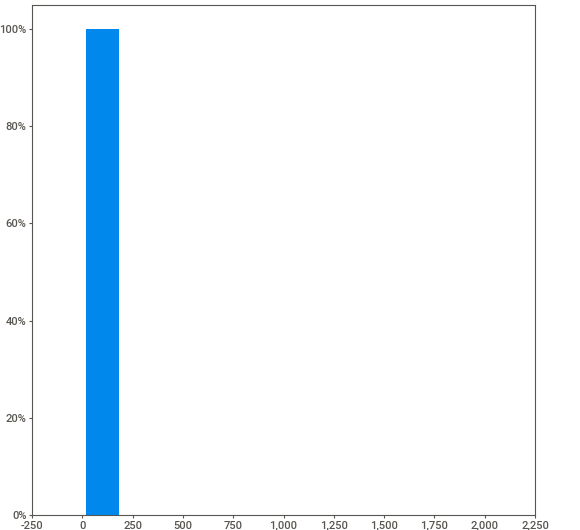
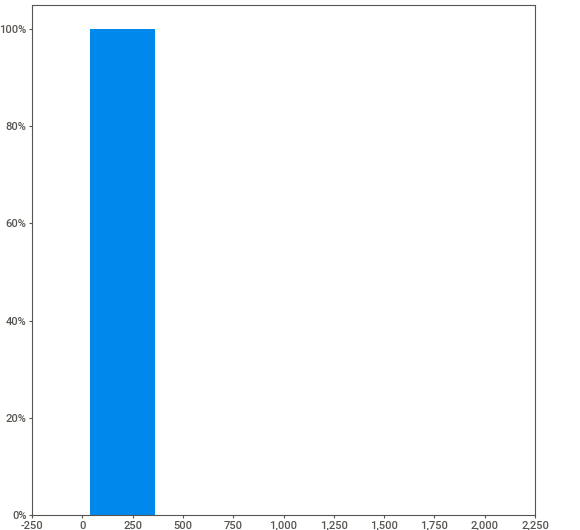
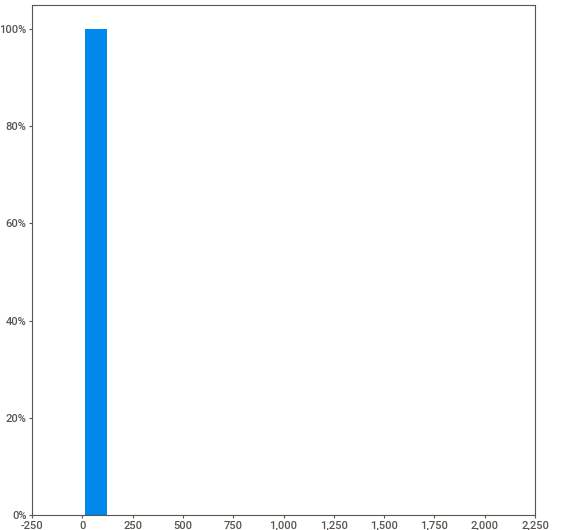
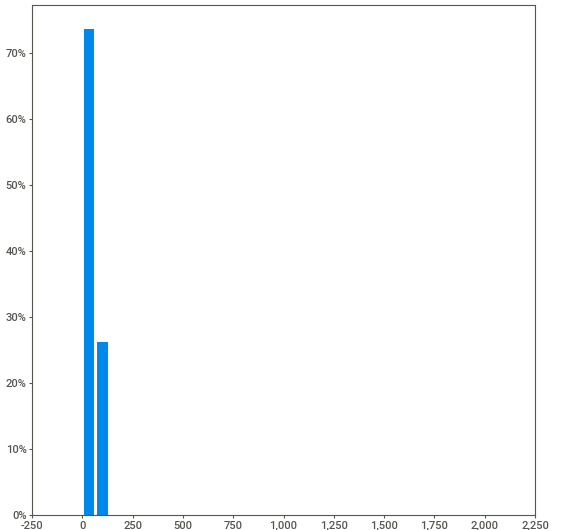
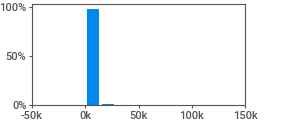
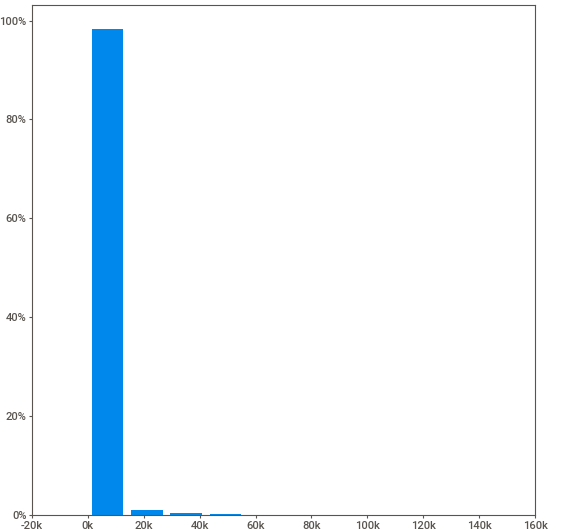
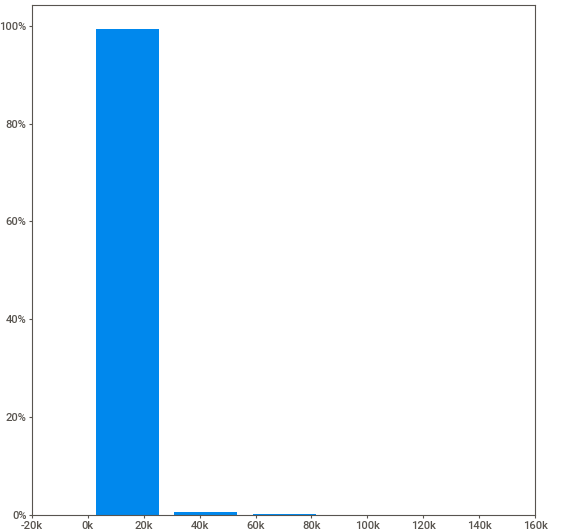
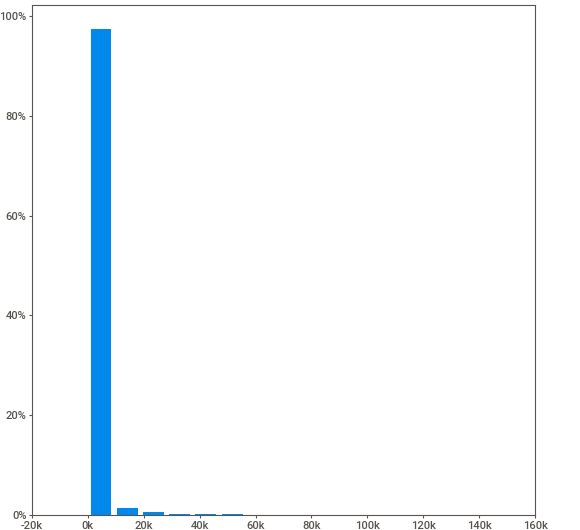
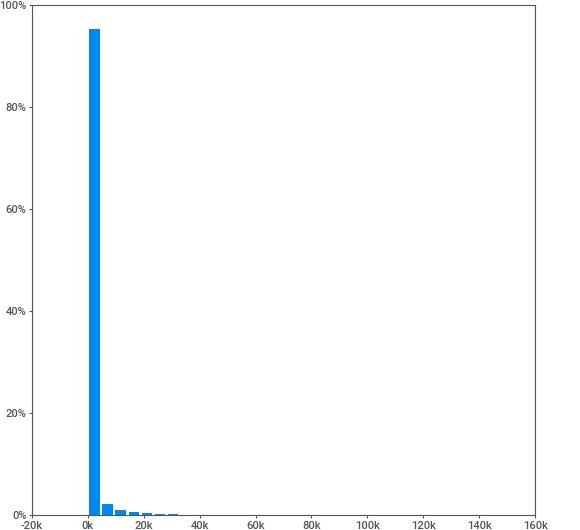
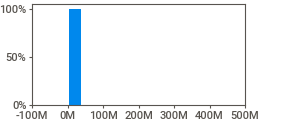
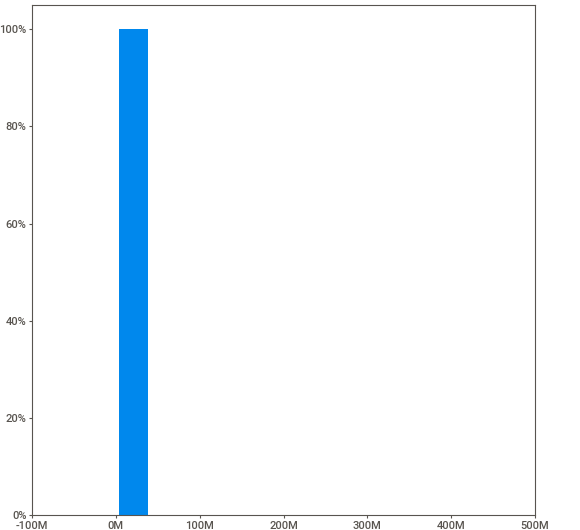
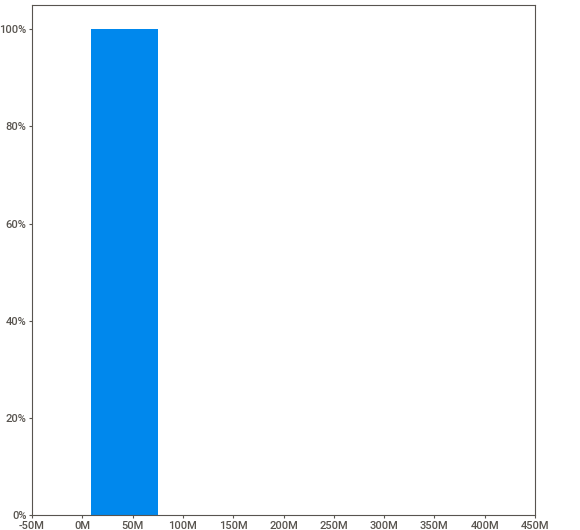
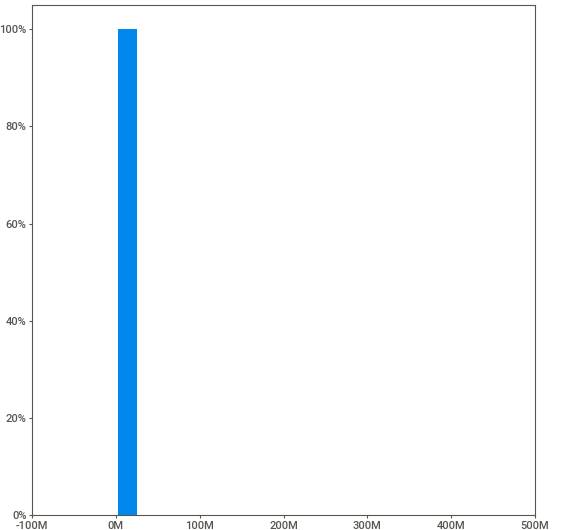
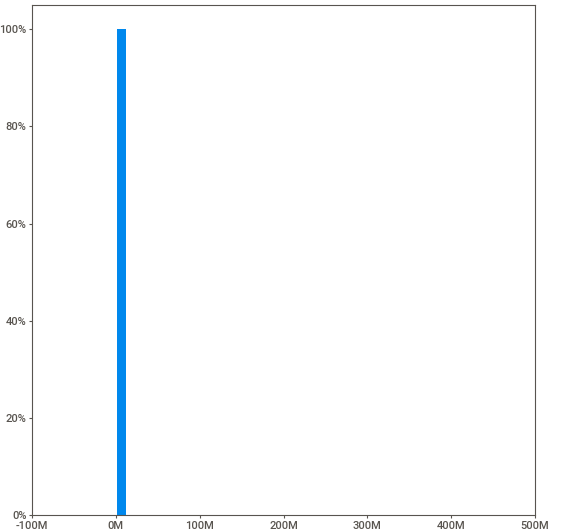
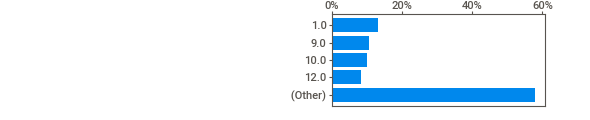
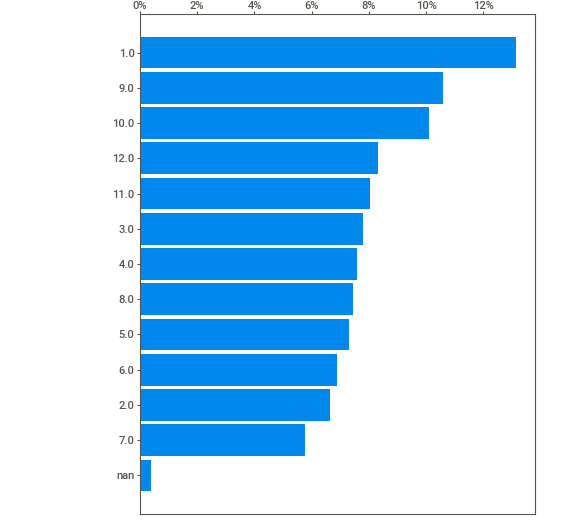
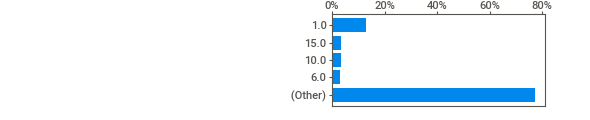
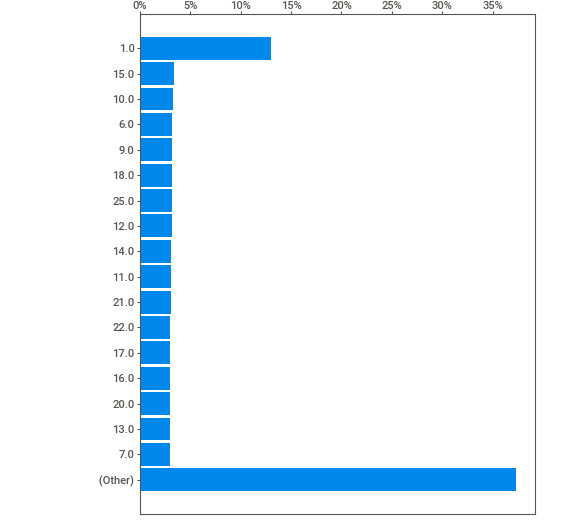
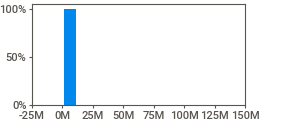
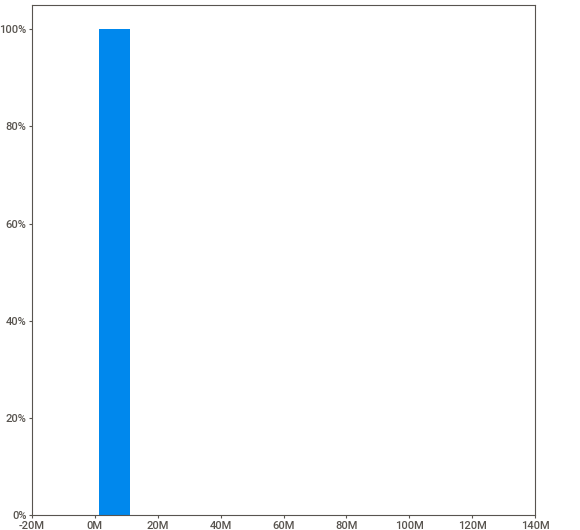
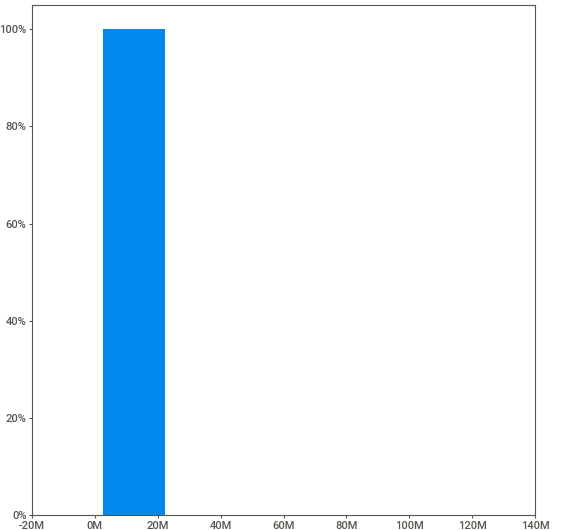
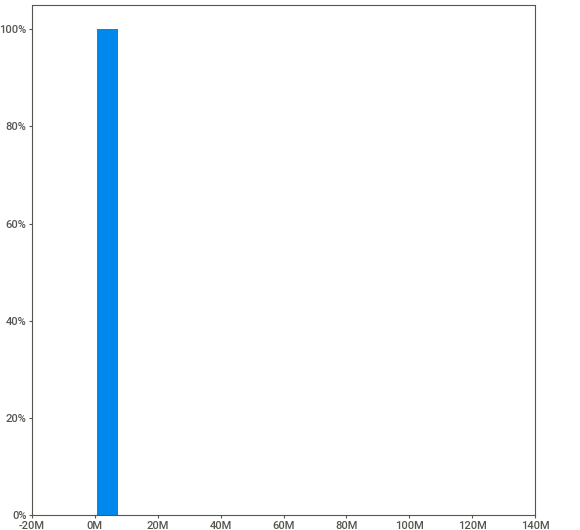
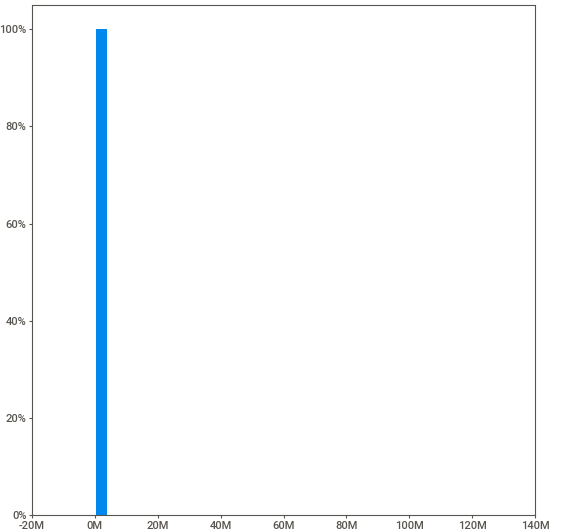
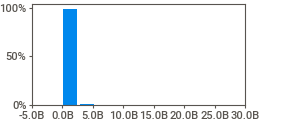
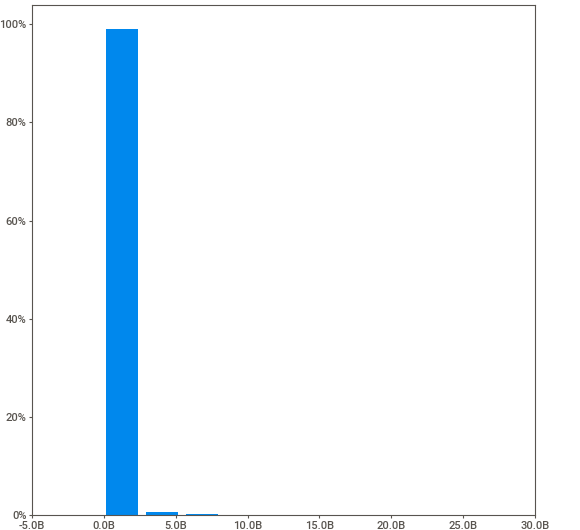
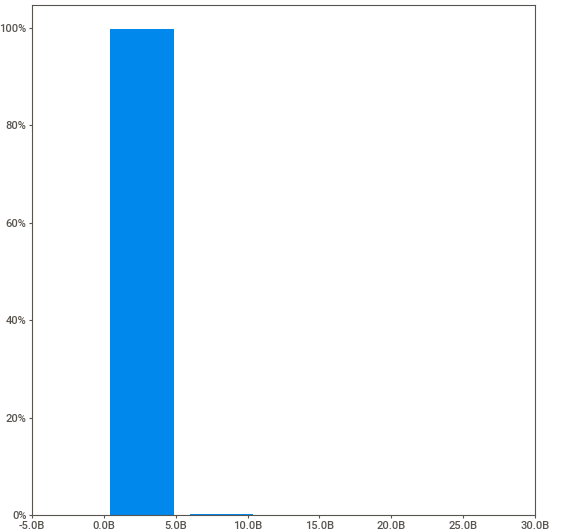
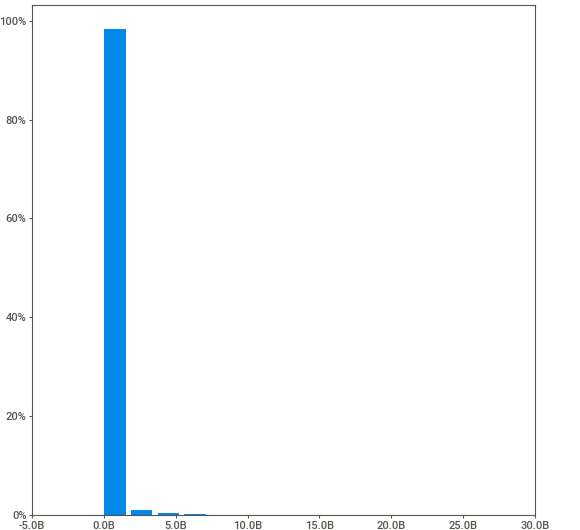
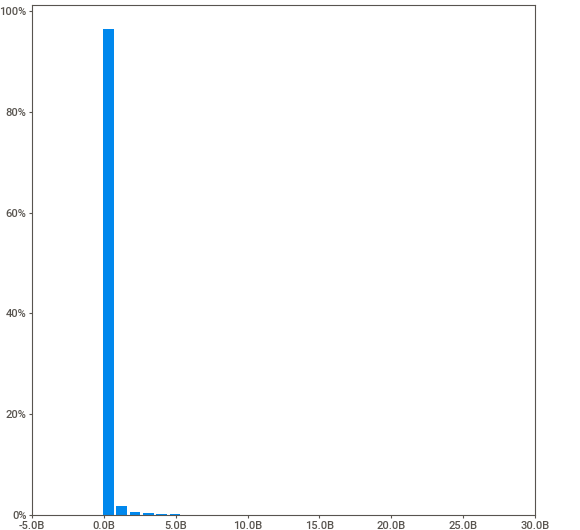
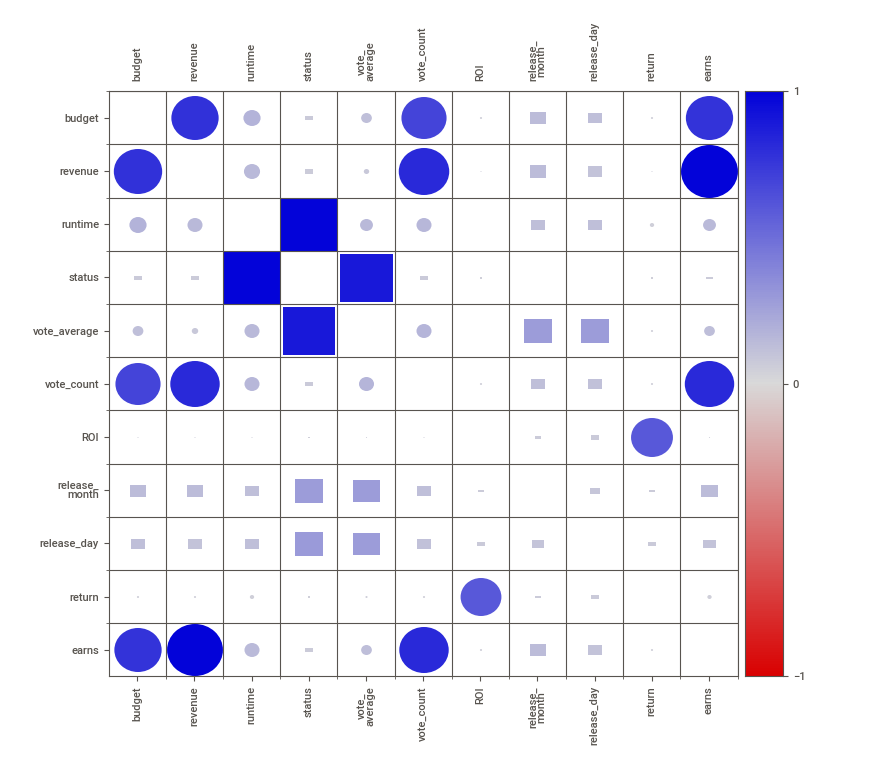
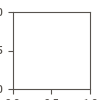

In [ ]:
reporte=sv.analyze(df)
reporte.show_notebook(h='full')

> En general en todos los datos se encuentran menos del 1% de datos perdidos o Nan, se observa bastante variabilidad de los datos.